In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

import glob
import random
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [2]:
import torch
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
print("using {} device".format(device))

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]= "1"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())

C:\ProgramData\Anaconda3\envs\idip_2021\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


using cuda device
Device: cuda
Current cuda device: 0
Count of using GPUs: 1


In [3]:
def padding(img):
    h,w,c = img.shape
    
    set_size = max(h,w)
    
    if (h >w):
        delta_w = set_size -w
        delta_h = h - set_size
    elif (h < w):
        delta_w = w - set_size
        delta_h = set_size -h
    elif (h == w ):
        return img
    
    top,bottom = delta_h//2 , delta_h-(delta_h//2)
        
    left , right = delta_w //2 , delta_w -(delta_w //2)
        
    new_img = cv2.copyMakeBorder(img,top,bottom,left,right,cv2.BORDER_CONSTANT,value = [0,0,0])
    
    return new_img    

In [4]:
def fill(img, height, width):
    img = cv2.resize(img, (height, width), cv2.INTER_CUBIC)
    return img

In [5]:
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    print(angle)
    height, width = img.shape
    M= cv2.getRotationMatrix2D((int(width/2), int(height/2)), angle, 1)
    img = cv2.warpAffine(img, M, (width,height))
    return img

In [6]:
def horizontal_shift(img, pixel):
    pixel = np.random.randint(-pixel, pixel)
    h, w = img.shape
    if pixel >0:
        new_img = np.zeros((h , w + pixel))
        new_img[:,:-pixel] = img
        new_img = new_img[:,pixel:]

        return new_img
    elif pixel < 0:
        new_img = np.zeros((h , w - pixel))
        new_img[:,-pixel:] = img
        new_img = new_img[: , :w]
        
        return new_img
    
    elif pixel ==0:
        return img

In [9]:
#padding alphabet
for i in range(26):
    images = sorted(glob.glob('./testimg/slicing a_z/%c/*.png' %(97+i)))
    z = 0
    
    for fname in images:
            
        img = cv2.imread(fname)
        img = padding(img)
        img = img[:,:,2]
        
        cv2.imwrite('./testimg/padding_a_z/%c/%d.png' %( 97+ i , z) , img)
        z = z+1
            

In [10]:
#rotation alphaet
for i in range(26):
    images = sorted(glob.glob('./testimg/padding_a_z/%c/*.png' %(97+i)))
    z = 0
    
    for fname in images:
            
        img = cv2.imread(fname)
        img = img[:,:,2]
        for a in range(len(img)):
            for b in range(len(img[0,:])):
                if 0<img[a,b]<200:
                    img[a,b] = img[a,b] + 20
                
        for j in range(4):
            new_img = rotation(img , 20)
            new_img = cv2.resize(new_img, (28, 28), cv2.INTER_CUBIC)
            cv2.imwrite('./testimg/minuscule/%c/%d.png' %( 97+ i ,  z) , new_img)
            z = z+1

4
-16
-10
0
3
-17
-8
-14
15
-5
2
0
10
18
-19
19
-4
6
0
-18
-4
3
-19
-3
17
-9
-7
-16
6
-9
5
-18
13
2
10
18
10
0
14
-5
-17
5
-15
9
0
1
3
2
-10
17
-5
0
-3
6
-11
-19
7
5
-5
5
-14
0
-10
-10
17
-14
-3
15
-10
0
-18
8
-5
0
-3
-8
-14
-17
17
16
2
12
-18
8
14
-1
7
14
11
18
8
14
18
-8
-3
-9
16
10
-4
-11
-5
-15
-12
-19
9
-18
4
4
-15
16
-4
-16
9
-2
3
19
-10
19
10
0
16
-3
10
6
7
17
19
-5
-16
8
-18
-17
1
3
0
-17
2
-15
-1
-4
0
-1
-7
4
-11
6
-7
-10
13
7
-13
6
9
-13
9
5
16
-19
11
-3
4
0
-1
11
3
-19
5
-9
-11
17
1
-15
19
6
2
17
-4
8
-16
-9
0
-3
12
16
-7
-12
-7
0
19
-15
-7
16
-15
2
-10
8
-16
-16
-5
17
2
-13
9
-14
-6
-3
16
3
-11
4
-19
4
2
6
-18
19
6
-17
-9
-19
2
-8
12
-15
-11
5
-8
0
-19
14
1
19
-11
-17
8
7
-8
-16
19
8
-9
12
-10
8
-17
-6
2
6
-16
-3
-9
10
-11
5
-8
4
-9
-2
-10
-16
10
4
17
13
-3
16
17
-14
-11
-14
12
19
0
-3
-3
5
6
-17
-13
16
11
-17
9
-18
-14
10
19
-17
-19
8
-6
0
3
12
-10
-8
5
-7
-19
14
-2
16
-6
17
9
-18
-7
6
16
0
-3
12
-17
-1
-13
17
11
4
-14
7
18
2
-11
-14
13
-4
16
-8
0
14
5
-12
-10
-15
-4
-8
1


In [11]:
# horizontal alphabet
for i in range(26):
    images = sorted(glob.glob('./testimg/minuscule/%c/*.png' %(97+i)))
    z = 0
    
    for fname in images:
            
        img = cv2.imread(fname)
        img = img[:,:,2]
        for a in range(len(img)):
            for b in range(len(img[0,:])):
                if 0<img[a,b]<200:
                    img[a,b] = img[a,b] + 20
                
        for j in range(4):
            new_img = horizontal_shift(img , 4)
            cv2.imwrite('./testimg/minuscule/%c/%d.png' %( 97+ i , 108 + z) , new_img)
            z = z+1
            

In [43]:
# padding Index

groups_folder_path = './testimg/Index_default/Index_cut'
groups_folder_path_2 = './testimg/Index_default/Index_padding'


categories = ["division", "equality", "factorial", "integral", "LBbracket", 
              "LEinequality", "Linequality", "LMbracket", "LSbracket", "minus",
              "multiplication", "plus", "RBbracket", "REinequality", "Rinequality",
              "RMbracket", "RSbracket"]

for category in categories:
    images = sorted(glob.glob('./testimg/Index_default/Index_cut/' + category + '/*.png')) 
    for filename in images:
        img = cv2.imread(filename)
        img = padding(img)
        img = img[:,:,2]
            
        cv2.imwrite(groups_folder_path_2 + '/' + category + '/%d.png'% z , img)
        z += 1
    
            



In [9]:
# padding Index2

groups_folder_path = './testimg/Index_default/Index_slicing'
groups_folder_path_2 = './testimg/Index_default/Index_padding_2'


categories = ["division", "equality", "factorial", "integral", "LBbracket", 
              "LEinequality", "Linequality", "LMbracket", "LSbracket", "minus",
              "multiplication", "plus", "RBbracket", "REinequality", "Rinequality",
              "RMbracket", "RSbracket"]

for category in categories:
    images = sorted(glob.glob('./testimg/Index_default/Index_slicing/' + category + '/*.png')) 
    z=0
    for filename in images:
        img = cv2.imread(filename)
        img = padding(img)
        img = img[:,:,2]
            
        cv2.imwrite(groups_folder_path_2 + '/' + category + '/%d.png'% z , img)
        z += 1
    
            

In [10]:
# augment Index
# rotation
groups_folder_path_3 = './testimg/Index'
z = 0

for category in categories:
    images = sorted(glob.glob(groups_folder_path_2 + '/' + category +  '/*.png'))     
    for filename in images:
            
        img = cv2.imread(filename)
        img = img[:,:,2]
        for a in range(len(img)):
            for b in range(len(img[0,:])):
                if 0<img[a,b]<50:
                    img[a,b] = img[a,b] + 30
          
        for j in range(4):
            new_img = rotation(img , 20)
            new_img = cv2.resize(new_img, (28, 28), cv2.INTER_CUBIC)  
            cv2.imwrite(groups_folder_path_3 + '/' + category + './%d.png' % z, new_img)
            z = z+1

-14
-7
-18
-5
-19
11
-1
-13
-14
0
-3
-7
-10
-2
7
2
13
6
-15
19
0
-15
-7
-13
-2
-14
10
4
-13
-4
-8
-1
-14
-3
0
1
15
-5
8
0
11
8
9
-17
14
-12
10
-6
-6
-19
3
-4
13
7
-4
-7
-14
-11
8
2
-16
-6
-10
18
-16
-9
-15
7
17
0
-19
-12
11
15
18
-19
16
18
10
11
-14
10
0
0
14
-5
7
-1
7
-16
-1
2
11
-11
18
6
-16
-5
18
0
-11
-12
-16
-3
-17
-8
12
10
-10
-15
12
12
-9
-10
-5
15
10
4
3
3
-9
-15
2
-4
16
-7
-9
19
-18
-17
-5
12
-10
-15
12
17
-5
5
10
-17
7
-11
-13
17
10
5
15
-8
7
10
-7
-17
12
-19
18
13
14
1
-12
16
6
8
3
10
-12
15
-15
16
-1
19
-16
-15
-1
-8
-14
12
14
14
9
-1
7
10
-14
-7
-6
3
-4
-12
16
-15
19
0
1
17
-11
8
8
9
14
15
7
-19
19
-10
15
5
-19
1
-14
17
3
13
5
5
5
7
14
-14
-1
-13
11
-12
3
-16
13
2
12
18
-12
-17
12
13
3
6
-2
15
-8
-15
9
9
3
11
19
11
7
13
5
14
0
-7
11
-14
-2
2
12
-13
-4
12
-6
14
-13
9
-3
-1
17
-15
-19
-11
-10
-17
2
12
-12
5
10
-13
7
-2
0
8
6
-15
18
14
-18
19
-10
19
-6
2
3
1
-12
-4
-8
15
-1
-12
2
4
-9
-5
4
-13
6
-11
5
19
9
-4
4
8
-18
0
-3
16
13
-1
-16
-7
17
-15
-7
8
-18
-9
14
-16
15
-2
8
2
-1

-3
-15
-14
-10
-13
14
-16
-13
-2
7
13
-18
-7
-10
-8
-16
-15
-16
8
-10
-4
1
18
-13
-13
-7
6
1
3
4
10
-15
-14
-9
-11
-13
9
2
8
7
18
15
-7
-4
5
-4
13
8
7
-5
-1
3
-12
-6
-4
-13
-10
-1
-16
3
-18
-16
-18
-3
2
9
11
11
18
-2
-12
-8
19
-2
10
11
12
-14
-1
4
-12
-1
-17
13
2
13
8
19
6
15
11
19
-16
16
7
15
11
5
0
-2
0
13
16
-1
0
12
2
-12
6
-4
-14
10
-11
-3
-16
-10
17
-9
19
-14
17
10
19
-1
9
15
16
-14
7
-8
-10
13
13
0
-6
-8
16
-2
2
10
-13
18
-13
14
-14
17
-8
4
4
-13
0
1
5
-4
7
16
13
11
8
-5
-13
11
6
-16
-15
3
-5
17
-11
17
-18
-3
-19
-10
18
16
-5
-2
4
-9
2
18
-15
-14
15
-13
-9
15
-2
-2
-1
-11
11
12
9
1
3
1
18
-5
15
8
8
10
-6
0
17
-17
-11
-6
-15
-13
8
13
9
17
10
13
2
-14
-8
-9
10
17
-4
19
-8
-19
-8
-13
11
-3
5
-1
-19
-1
16
-12
1
14
-1
5
-13
16
-2
-17
-13
-8
2
12
-15
14
10
11
0
-2
-15
-10
-8
-2
16
2
-1
2
0
11
-7
4
13
-7
18
1
-15
-8
7
-17
-6
0
-9
6
-3
14
-6
7
6
18
-2
-6
16
12
0
-17
-4
18
-3
3
-2
0
-5
8
2
0
2
-6
-13
-11
7
-17
-12
19
-7
8
-15
-2
3
-19
-8
-3
8
-2
17
5
9
-1
-18
-1
-13
1
6
7
0
14
7
10
-14
-1

In [11]:
#horizontal_shift_Index

z = 0

for category in categories:
    images = sorted(glob.glob(groups_folder_path_3 + '/' + category +  '/*.png'))     
    for filename in images:
            
        img = cv2.imread(filename)
        
        img = img[:,:,2]
        for a in range(len(img)):
            for b in range(len(img[0,:])):
                if 0<img[a,b]<50:
                    img[a,b] = img[a,b] + 30
          
        for j in range(4):
            new_img = horizontal_shift(img , 3)                   
            
            cv2.imwrite(groups_folder_path_3 + '/' + category + './%d.png' % (z+3400), new_img)
            z = z+1

In [72]:
img = cv2.imread('./testimg/padding_a_z/a/0.png')

In [88]:
img = rotation(img,30)

15


In [97]:
img_1 = cv2.imread('./testimg/basic a_z - 27/a/19.png')

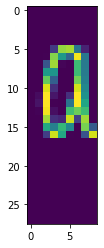

In [98]:
plt.imshow(img_1[:,:,2])

In [99]:
img_2 = padding(img_1)

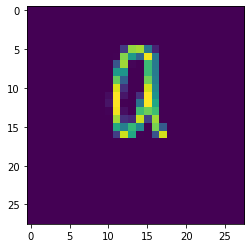

In [100]:
plt.imshow(img_2[:,:,2])

In [74]:
ix = cv2.imread(groups_folder_path_2 + '/' + 'division' +  '/0.png')

ix_3 = cv2.blur(ix , (3,3))
ix = ix[:,:,2]
ix_3 = ix_3[:,:,2]

ix_3 = cv2.resize(ix_3, (28, 28), cv2.INTER_CUBIC)
ix   =  cv2.resize(ix, (28, 28), cv2.INTER_CUBIC)

print(ix )
print(ix_3)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [67]:
print(ix_2[:,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [81]:
ix_ex = cv2.imread('./testimg/Index/division/198.png')
ix_ex = ix_ex[:,:,0]
print(ix_ex)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  71  93  6

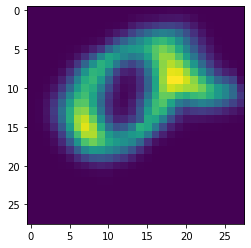

In [89]:
plt.imshow(img[:,:,2])

In [6]:
import torch
torch.__version__

'1.10.2'

In [7]:
torch.cuda.is_available()

True

In [9]:
img_1 = plt.imread("./testimg/Index/factorial/s1.png")

In [13]:
print(img_1[:,:,2])

[[0.9882353 0.9882353 0.9882353 ... 0.9882353 0.9882353 0.9882353]
 [0.9882353 0.9882353 0.9882353 ... 0.9882353 0.9882353 0.9882353]
 [0.9882353 0.9882353 0.9882353 ... 0.9882353 0.9882353 0.9882353]
 ...
 [0.9882353 0.9882353 0.9882353 ... 0.9882353 0.9882353 0.9882353]
 [0.9882353 0.9882353 0.9882353 ... 0.9882353 0.9882353 0.9882353]
 [0.9882353 0.9882353 0.9882353 ... 0.9882353 0.9882353 0.9882353]]
